In [1]:
# https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb
from speedml import Speedml
sml = Speedml('./input/train.csv', 
              './input/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')
sml.shape()

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


u'train (891, 11) | test (418, 10)'

In [2]:
sml.configure('overfit_threshold', 
              sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])

{u'high_cardinality': 10,
 u'outlier_threshold': 3,
 u'outpath': u'output/',
 u'overfit_threshold': 0.033501260508640406,
 u'unique_ratio': 80}

In [3]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Outliers Upper,"[SibSp, Fare]",Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.


In [4]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


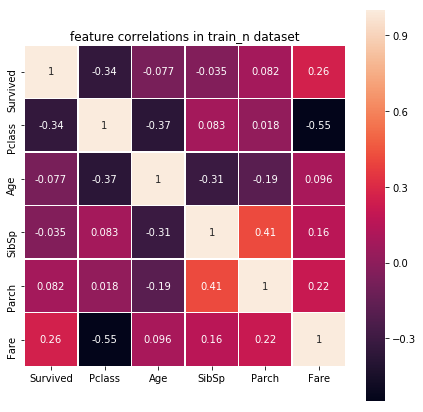

In [5]:
sml.plot.correlate()

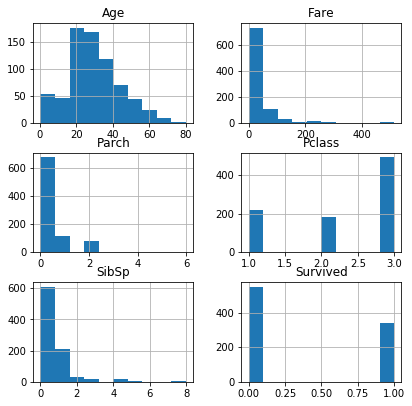

In [6]:
# We can use distributions to understand skew (left/right) for determining outliers.
sml.plot.distribute()

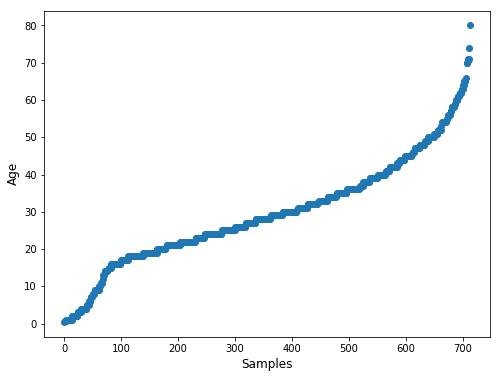

In [7]:
# Continuous or high-cardinality numerical features are better plotted using scatter plot for 
# determining outliers.
# We do not expect outliers in case of Age feature as the distribution plot is fairly close 
# to normal (rising in the middle of x-axis and falling on either sides evenly).
sml.plot.continuous('Age')

# The method clearly shows some outliers in case of Fare feature. This coincides with our 
# observation from the distribution plot for the Fare feature which is skewed towards left.

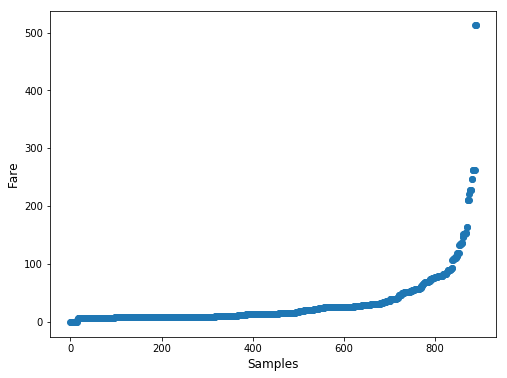

In [8]:
sml.plot.continuous('Fare')

In [9]:
# To correct the outliers we fix only values in upper range of the 99th percentile. 
# As the results show these constitute around 1% of overall samples.
sml.feature.outliers('Fare', upper=98)

u'Fixed 17 or 1.91% upper outliers. '

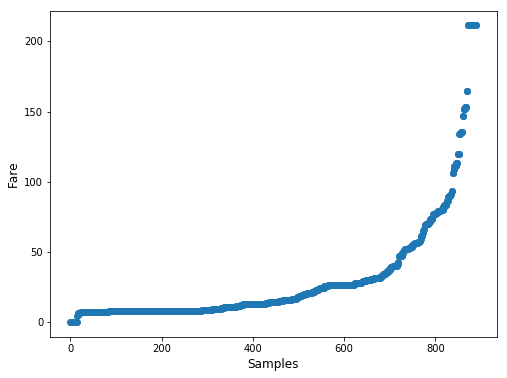

In [10]:
# While we impact only a few samples, the outliers fix is fairly significant 
# as shown by the same plot after the fix.
sml.plot.continuous('Fare')

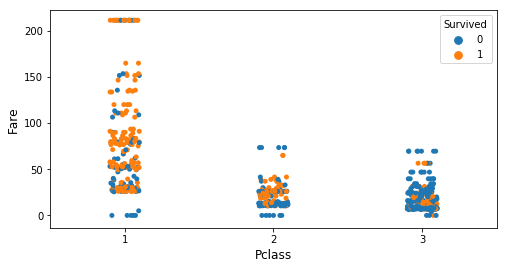

In [11]:
sml.plot.strip('Pclass', 'Fare')

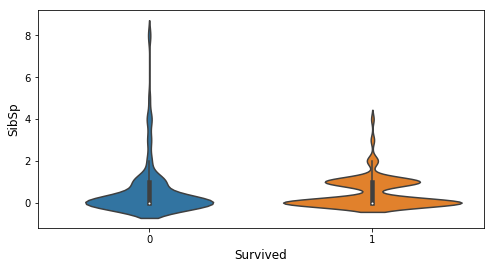

Fixed 7 or 0.79% upper outliers. 


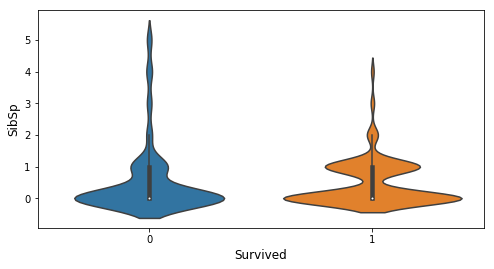

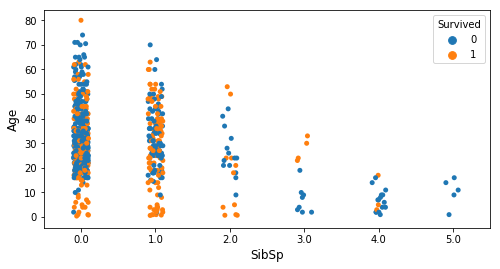

In [12]:
sml.plot.ordinal('SibSp')
print(sml.feature.outliers('SibSp', upper=99))
sml.plot.ordinal('SibSp')
sml.plot.strip('SibSp', 'Age')

## Feature Engineering For High-Cardinality
High-cardinality features like Ticket and Age are candidates for feature engineering. 
We use the density method to create a new feature based on Age and Ticket and drop the Ticket feature in turn. 
This simple iteration improves our model significantly and helps us jump 100s of positions on the Kaggle leaderboard.

In [13]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Nulls,1014,Use feature.impute.
Shape,"train (891, 11) | test (418, 10)",
Numerical Ratio,54%,Aim for 100% numerical.
Numerical High-cardinality,"[Age, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Survived, Pclass, SibSp, Parch]",Use plot.ordinal.
Text High-cardinality,"[Ticket, Cabin]",(>10) categories. Use feature.labels.
Text Categorical,"[Sex, Embarked]",Use feature.labels or feature.mapping.
Text Unique,[Name],~80% unique. Use feature.extract or feature.drop.
Target Analysis (Survived),Model ready.,Use classification models.


In [14]:
sml.feature._density_by_feature('Age')
sml.train[['Age', 'Age_density']].head()

,Age,Age_density
0,22.0,27
1,38.0,11
2,26.0,18
3,35.0,18
4,35.0,18


In [15]:
sml.feature._density_by_feature('Ticket')
sml.train[['Ticket', 'Ticket_density']].head()

,Ticket,Ticket_density
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [16]:
sml.feature.drop(['Age','Ticket'])

u'Dropped 2 features with 11 features available.'

## Extracting New Features
We will now extract new features Deck from Cabin and FamilySize from Parch and SibSp.

In [17]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0.0,1.0,2.0,3.0,4.0,5.0
Survived,,,,,,
0,398,97,15,12,15,12
1,210,112,13,4,3,0


In [18]:

sml.plot.crosstab('Survived', 'Parch')

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


In [19]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)
sml.feature.drop(['Parch', 'SibSp'])

u'Filled 1014 null values across test and train datasets.'

u'Dropped 1 features with 11 features available.'

u'Dropped 2 features with 10 features available.'

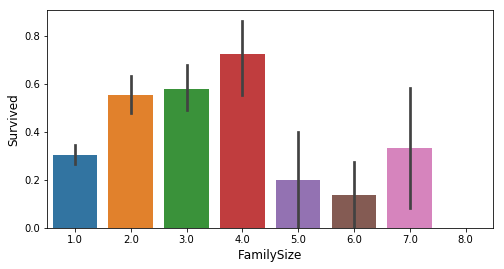

In [20]:
sml.plot.bar('FamilySize', 'Survived')

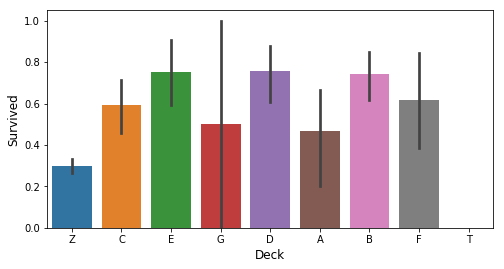

In [21]:
sml.plot.bar('Deck', 'Survived')

In [22]:
sml.feature.impute()
sml.info()

u'Imputed 2 empty values to 0.'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null float64
Fare              891 non-null float64
Name              891 non-null object
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 76.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
FamilySize        418 non-null float64
Fare              418 non-null float64
Name              418 non-null object
Pclass            418 non-null int64
Sex               418 non-null int64
Ticket_

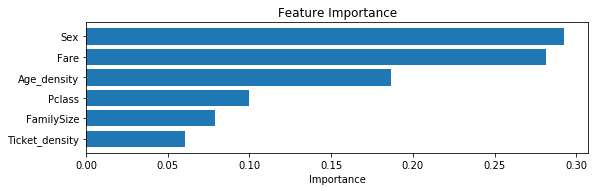

In [23]:
sml.plot.importance()

In [24]:
sml.train.head()

,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Ticket_density
0,27,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,1
1,11,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1
2,18,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,1
3,18,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,2
4,18,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0,1


In [25]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [26]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')
sml.feature.replace('Title', 'Mlle', 'Miss')
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')
sml.train[['Name', 'Title']].head()

u'Replaced matching list of strings across train and test datasets.'

u'Replaced matching list of strings across train and test datasets.'

u'Replaced matching list of strings across train and test datasets.'

u'Replaced matching list of strings across train and test datasets.'

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [27]:
sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()

u'Dropped 1 features with 10 features available.'

,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Ticket_density,Title
0,27,8,2,2.0,7.2500,3,0,0,1,2
1,11,2,0,2.0,71.2833,1,1,1,1,3
2,18,8,2,1.0,7.9250,3,1,1,1,1
3,18,2,2,2.0,53.1000,1,1,1,2,3
4,18,8,2,1.0,8.0500,3,0,0,1,2


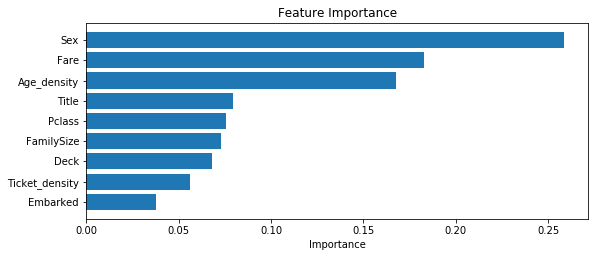

In [28]:
sml.plot.importance()

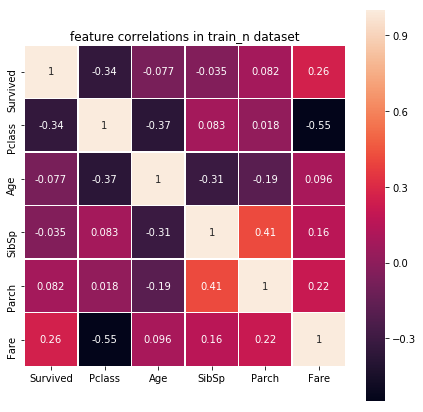

In [5]:
sml.plot.correlate()
# attention: features related with survived are most important
# values near to zero are of no importance

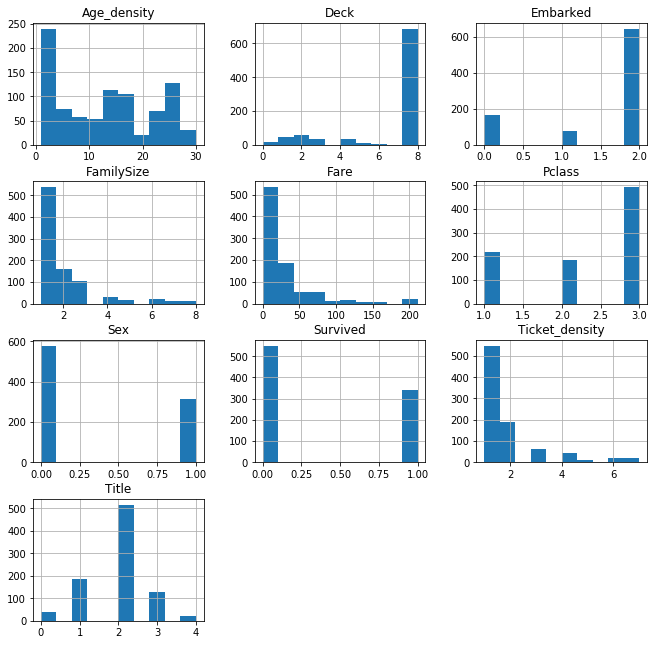

In [30]:
sml.plot.distribute()

In [31]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Shape,"train (891, 10) | test (418, 9)",
Numerical High-cardinality,"[Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


In [32]:
sml.model.data()

u'train_X: (891, 9) train_y: (891,) test_X: (418, 9)'

## Hyper-parameters Tuning
This is an important step in the workflow. We optimize the hyper-parameters used for our XGBoost classifier to get the best results. We do this iteratively by setting certain hyper-parameters as fixed while checking permutations for two select parameters at a time.

The resulting table ranks the permutations based on accuracy, highest rank = 1.

We now substitute the highest ranking parameters as fixed in the next round of optimization, selecting an alternate pair of parameters to optimize this time. Repeat this process for as many parameters as required. Normally two rounds of tuning is sufficient.

In [ ]:
select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

In [47]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 3, 'min_child_weight': 1, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

In [33]:
tuned_params = {'learning_rate': 0.3, 'subsample': 0.7, 
                'max_depth': 7, 'min_child_weight': 3,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml.xgb.cv(tuned_params)

In [34]:
sml.xgb.cv_results.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
17,0.179775,0.014650,0.112641,0.004978
18,0.176404,0.010420,0.109551,0.004700
19,0.175281,0.013007,0.107865,0.003597
20,0.174157,0.013295,0.107303,0.003025
21,0.171910,0.010420,0.105618,0.002723


In [35]:
tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

## Model Evaluation and Prediction
We can now evaluate various models against our datasets to see which one is best suited.

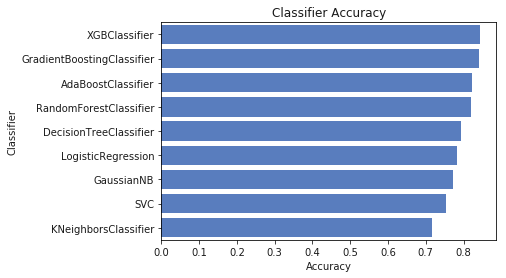

In [36]:
sml.xgb.classifier()
sml.model.evaluate()
sml.plot.model_ranks()

In [37]:
sml.model.ranks()

,Classifier,Accuracy
0,XGBClassifier,0.844444
0,GradientBoostingClassifier,0.840000
0,AdaBoostClassifier,0.823333
0,RandomForestClassifier,0.821111
0,DecisionTreeClassifier,0.792222
0,LogisticRegression,0.783333
0,GaussianNB,0.772222
0,SVC,0.753333
0,KNeighborsClassifier,0.715556


In [39]:
sml.xgb.fit()
sml.xgb.predict()
sml.plot.xgb_importance()

TypeError: Argument 'obj' has incorrect type (expected list, got newlist)

In [40]:
sml.xgb.feature_selection()

Accuracy: 79.100000%
Thresh=0.061, n=9, Accuracy: 79.10%
Thresh=0.068, n=8, Accuracy: 79.48%
Thresh=0.070, n=7, Accuracy: 80.22%
Thresh=0.070, n=7, Accuracy: 80.22%
Thresh=0.070, n=7, Accuracy: 80.22%
Thresh=0.097, n=4, Accuracy: 76.12%
Thresh=0.121, n=3, Accuracy: 76.12%
Thresh=0.129, n=2, Accuracy: 73.51%
Thresh=0.313, n=1, Accuracy: 71.64%


In [41]:
sml.xgb.sample_accuracy()

u'Accuracy = 90.24%. Found 804 correct of 891 total labels'

In [42]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='output/titanic-speedml-{}.csv'.format(sml.slug()))
sml.slug()

u'Results saved.'

u'e17.19-m84.44-s90.24-f79.10'

In [ ]:
sml.xgb.hyper?

In [48]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**fixed_params), select_params, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [49]:
optimized_GBM

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.3, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [ ]:
from speedml.base import Base
optimized_GBM.fit(Base.train_X, Base.train_y)

In [ ]:
Base